In [1]:
# Necessary packages
import ipynb.fs.full.provenance as pr
import pandas as pd
import numpy as np

from IPython.display import Image

# Specify where to save the processed files as savepath
savepath = 'results/binarizer_prov/'

In [2]:
# Files get loaded from fairCorrect github repository
url = 'https://raw.githubusercontent.com/vladoxNCL/fairCorrect/master/Datasets/'
df = pd.read_csv(url + 'compas-scores-two-years.csv', header=0)

# select relevant columns
df =df[['age', 'c_charge_degree', 'race', 'sex', 'priors_count', 'days_b_screening_arrest',
        'two_year_recid', 'c_jail_in', 'c_jail_out']]

df =df[['age', 'c_charge_degree', 'race']]
df = df[:3]

# Create a new provenance document 
p = pr.Provenance(df, savepath)

In [3]:
#BINARIZER
# Make race binary
df.race = [0 if r != 'Caucasian' else 1 for r in df.race]

#GET PROVENANCE
d = p.getProv_Binarizer(df, ['race'])


getProv_Binarizer function took 2.865 ms


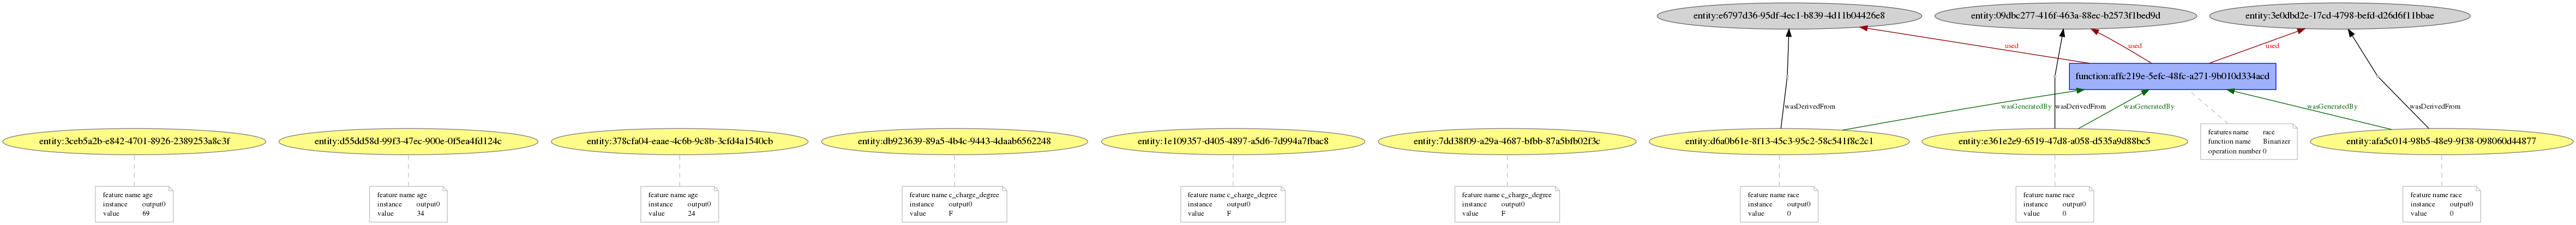

In [4]:
namefile = savepath + 'binarizer_prov'
p.save_graph(namefile)
Image(namefile + '.png')

In [5]:
from prov.model import ProvEntity, ProvActivity, ProvUsage, ProvDerivation

ent = list(d.get_records(ProvEntity))
acts = list(d.get_records(ProvActivity))
a = list(d.get_records(ProvUsage))
print(a)


[<ProvUsage: (function:affc219e-5efc-48fc-a271-9b010d334acd, entity:e6797d36-95df-4ec1-b839-4d11b04426e8)>, <ProvUsage: (function:affc219e-5efc-48fc-a271-9b010d334acd, entity:09dbc277-416f-463a-88ec-b2573f1bed9d)>, <ProvUsage: (function:affc219e-5efc-48fc-a271-9b010d334acd, entity:3e0dbd2e-17cd-4798-befd-d26d6f11bbae)>]
